### Medical Insurance Cost Forecast Using a RandomForestRegressor Model, and Train the Model using the Charges datapoints.

In [108]:
### Import necessary Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [68]:
### Load CSV file from Local drive

df1 = pd.read_csv('medical cost.csv')

df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [69]:
df1.shape

(1338, 7)

In [70]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 57.6+ KB


In [71]:
df1.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [72]:
## Check for NULL values


df1.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

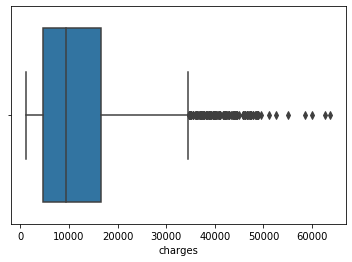

In [73]:
### Check for Outlier


sns.boxplot(df1.charges)

plt.show()

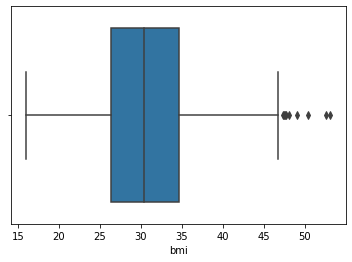

In [74]:
### Check for Outlier


sns.boxplot(df1.bmi)

plt.show()

In [76]:
### Group by Sex

df1[['sex','age']].groupby('sex').agg(['mean','count'])

age      
             mean count
sex                    
female  39.503021   662
male    38.917160   676

In [77]:
### Group by Sex


df1[['sex','children']].groupby('sex').agg(['mean'])

,children
,mean
sex,
female,1.074018
male,1.115385


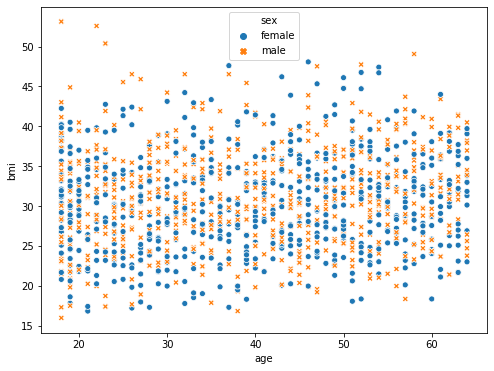

In [78]:
### Visualize to understand data for Outlier


plt.figure(figsize=(8, 6))

sns.scatterplot(data=df1, x="age", y="bmi", hue="sex", style="sex")

plt.show()

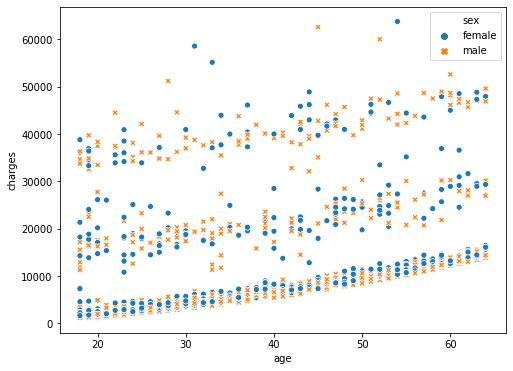

In [79]:
### Visualize to understand data


plt.figure(figsize=(8, 6))

sns.scatterplot(data=df1, x="age", y="charges", hue="sex", style="sex")

plt.show()

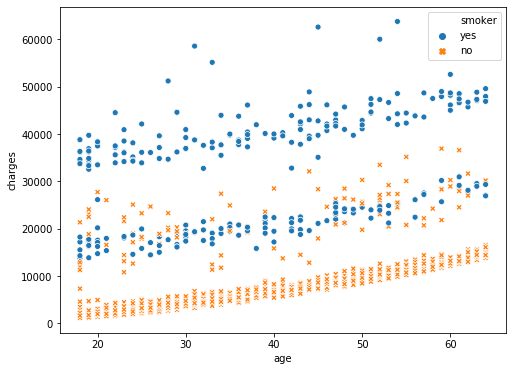

In [80]:
### Visualize to understand data


plt.figure(figsize=(8, 6))

sns.scatterplot(data=df1, x="age", y="charges", hue="smoker", style="smoker")

plt.show()

In [81]:
# Remove Outliers from bmi > 49


df1 = df1[df1['bmi'] < 49]

In [82]:
df1.shape

(1334, 7)

#### Convert Dtype object to integer

In [83]:
# Finding categorical data:


df1['smoker'].value_counts()

no     1061
yes     273
Name: smoker, dtype: int64

In [84]:

def ref(y):
  if y == 'no':
    return 1
  else:
    return 0

df1['smoker'] = df1['smoker'].map(ref)

In [85]:
df1['region'].value_counts()

southeast    360
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [86]:
def ref1(y):
  if y == 'southwest':
    return 1
  elif y == 'southeast':
    return 2
  elif y == 'northwest':
    return 3
  else:
    return 4

df1['region'] = df1['region'].map(ref1)

In [87]:
df1['sex'].value_counts()

male      672
female    662
Name: sex, dtype: int64

In [88]:
# def ref(x):
# if x == 'male'
#   return 0
#  else:
#    return 1

#df1['sex'] = df1['sex'].map(ref)

In [89]:
###  Apply OneHot Encoding


sex = pd.get_dummies(df1['sex'])

X = pd.concat([df1, sex], axis=1)

In [90]:
X.head()

,age,sex,bmi,children,smoker,region,charges,female,male
0,19,female,27.900,0,0,1,16884.92400,1,0
1,18,male,33.770,1,1,2,1725.55230,0,1
2,28,male,33.000,3,1,2,4449.46200,0,1
3,33,male,22.705,0,1,3,21984.47061,0,1
4,32,male,28.880,0,1,3,3866.85520,0,1


#### Split Data into Dependent & Independent


In [91]:
Y = df1['charges']
X = df1.drop(['charges', 'sex'], axis = 1)


In [93]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state = 42)


In [94]:
### Using RandomForestRegressor


random_model = RandomForestRegressor(n_estimators=300, random_state = 42, n_jobs = -1)


In [96]:
### Predict Data


random_model.fit(Xtrain, Ytrain)

pred = random_model.predict(Xtest)

print(pred)


[11654.8295968   7025.31011     6096.28587467  9350.8394445
 19978.21889783  1908.42197103 11826.32740547 15495.83948783
 11106.067105   47534.75434263 12110.45685263 13161.9338349
  1608.286809   13497.31370063  7492.49080733  8377.16686543
 11424.3551271  39623.3792644   8003.8990208   5371.1038107
  3624.8598566   5287.5416866   9642.75109867 11595.52698767
 29087.21781167 18022.78545087  8939.28034177  3842.0787426
 19102.72119177  2185.064417   12832.15984217  2200.0573455
  3882.7746045   7821.25621977 10463.11709603 10360.08433773
  7747.78526213  5545.6028872  13904.50229863  9871.3990931
  2878.87287287 20263.22802347  8672.7206914   7172.78465043
 11536.46067997  4697.74727363  1608.27378067 12063.0945354
  6994.063096   11356.51212887 14229.59850077 20988.14920513
  3348.07083018 19015.35809197  7481.56981547 44845.90931273
  8155.31697373 41302.35912077 44192.7005714  10680.96384987
  6263.58328437  6252.7871155   2989.72332217  3355.2605987
 21184.1454329  11384.69030403  

In [98]:
### Check the accuracy for Train


random_model_accuracy = round(random_model.score(Xtrain, Ytrain)*100,2)

print(round(random_model_accuracy, 2), '%')

97.64 %


In [99]:
### Check the accuracy for Test


random_model_accuracy1 = round(random_model.score(Xtest, Ytest)*100,2)

print(round(random_model_accuracy1, 2), '%')

85.79 %


In [100]:
### Check R Squared Value


r2_score(pred, Ytest)

0.8499512954648503

In [104]:
### Display Actual and Predicted Data


pd.DataFrame(np.c_[Ytest , pred], columns = ['Actual' , 'Predicted'])

,Actual,Predicted
0,8688.85885,11654.829597
1,7045.49900,7025.310110
2,6474.01300,6096.285875
3,9249.49520,9350.839444
4,17352.68030,19978.218898
...,...,...
262,12949.15540,16614.101109
263,6067.12675,6521.794533
264,63770.42801,47925.584306
265,2221.56445,2961.337043


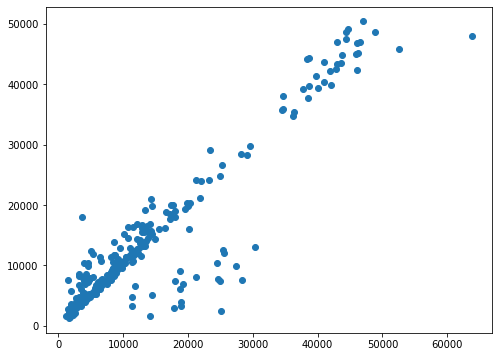

In [106]:
### Visualize Actual & Predicted Data


plt.figure(figsize=(8, 6))

plt.scatter(Ytest, pred)

plt.show()


In [109]:
### Using Linear Regression Model


reg = LinearRegression()

reg.fit(Xtrain, Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [112]:
### Training


print(round(reg.score(Xtrain, Ytrain)*100, 2))

74.08


In [113]:
### Testing


print(round(reg.score(Xtest, Ytest)*100, 2))

78.23


### RandomForestRegressor gives a higher accuracy than Linear Regression